In [1]:
from time import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import random
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, Imputer
from sklearn.model_selection import cross_val_score, TimeSeriesSplit, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn import metrics
from catboost import CatBoostClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA 

%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'

#### *Loading the data*

In [191]:
data = pd.read_csv('new_data.csv')

In [192]:
data.head()

,Date,30mortgage_one_change,30mortgage_five_change,15mortgage_one_change,15mortgage_five_change,Case_shiller_index_one_change,Case_shiller_index_five_change,us_libor_one_change,us_libor_five_change,uk_libor_one_change,...,chf_gold_one_change_5d_max,jpy_gold_one_change_5d_max,cad_gold_one_change_5d_max,aud_gold_one_change_5d_max,us_crude_one_change_5d_max,eur_crude_one_change_5d_max,chf_crude_one_change_5d_max,dollar_one_change_5d_max,returns,target
0,2005-12-05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001702,-0.002468,0.007907,...,0.018251,0.019389,0.013652,0.013872,0.020950,0.025314,0.022836,0.007591,-0.000656,0
1,2005-12-06,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000309,-0.002467,0.004184,...,0.018251,0.019389,0.013652,0.013872,0.020950,0.025314,0.022836,0.002841,0.005143,1
2,2005-12-07,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.000462,-0.008736,0.000000,...,0.018251,0.019389,0.013652,0.013872,0.020950,0.025314,0.022836,0.005143,-0.006967,0
3,2005-12-08,0.009585,0.009585,0.010327,0.010327,0.0,0.0,0.016854,0.014344,-0.010417,...,0.012413,0.014592,0.010714,0.012662,0.025346,0.016225,0.014269,0.005143,-0.000110,0
4,2005-12-09,0.000000,0.009585,0.000000,0.010327,0.0,0.0,0.015815,0.034535,-0.069474,...,0.014779,0.014592,0.011737,0.012662,0.025346,0.016225,0.014269,0.005143,-0.012937,0


In [193]:
data.Date = pd.to_datetime(data.Date)
data.set_index('Date', inplace=True)
data.head()

,30mortgage_one_change,30mortgage_five_change,15mortgage_one_change,15mortgage_five_change,Case_shiller_index_one_change,Case_shiller_index_five_change,us_libor_one_change,us_libor_five_change,uk_libor_one_change,uk_libor_five_change,...,chf_gold_one_change_5d_max,jpy_gold_one_change_5d_max,cad_gold_one_change_5d_max,aud_gold_one_change_5d_max,us_crude_one_change_5d_max,eur_crude_one_change_5d_max,chf_crude_one_change_5d_max,dollar_one_change_5d_max,returns,target
Date,,,,,,,,,,,,,,,,,,,,,
2005-12-05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.001702,-0.002468,0.007907,0.058400,...,0.018251,0.019389,0.013652,0.013872,0.020950,0.025314,0.022836,0.007591,-0.000656,0
2005-12-06,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000309,-0.002467,0.004184,0.020734,...,0.018251,0.019389,0.013652,0.013872,0.020950,0.025314,0.022836,0.002841,0.005143,1
2005-12-07,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-0.000462,-0.008736,0.000000,0.010526,...,0.018251,0.019389,0.013652,0.013872,0.020950,0.025314,0.022836,0.005143,-0.006967,0
2005-12-08,0.009585,0.009585,0.010327,0.010327,0.0,0.0,0.016854,0.014344,-0.010417,0.071630,...,0.012413,0.014592,0.010714,0.012662,0.025346,0.016225,0.014269,0.005143,-0.000110,0
2005-12-09,0.000000,0.009585,0.000000,0.010327,0.0,0.0,0.015815,0.034535,-0.069474,-0.068002,...,0.014779,0.014592,0.011737,0.012662,0.025346,0.016225,0.014269,0.005143,-0.012937,0


In [16]:
data.isnull().sum().sum()

0L

In [17]:
data.corr()['dollar_one_change'].sort_values(ascending=False)[:10]

dollar_one_change            1.000000
EUR/USD_one_change           0.742144
USEERI_one_change            0.700334
SDK/USD_one_change           0.609863
SWF/USD_one_change           0.557583
GBP/USD_one_change           0.519880
dollar_one_change_5d_mean    0.444081
dollar_five_change           0.443886
CAD/USD_one_change           0.416505
AUD/USD_one_change           0.404256
Name: dollar_one_change, dtype: float64

In [18]:
data.corr()['target'].sort_values(ascending=False)[:10]

target                                     1.000000
aus10_yield_one_change_5d_std              0.045410
ita10_yield_one_change_5d_std              0.043489
jpy_libor_one_change                       0.042627
us_2year_bond_futures_one_change_5d_std    0.042603
cac_40_one_change_5d_std                   0.038509
EuroEERI_one_change_5d_std                 0.037568
eu_stoxx_50_one_change_5d_std              0.036909
chf_libor_one_change_5d_std                0.035640
fra10_yield_one_change_5d_std              0.035616
Name: target, dtype: float64

In [19]:
y = data.target.values

#### *Calculate the Baseline*


In [20]:
round(1 - y.mean(), 2)

0.52

#### *Train/test split*

In [305]:
# Train set - 80% of the data
train_set = int(round(data.shape[0]*.8))
train_set

2442

#### Train set

In [306]:
X_train = data.iloc[:train_set, :-2]
X_train.shape

(2442, 384)

In [307]:
y_train = data.iloc[:train_set, -1].values
y_train.shape

(2442,)

#### Test set

In [308]:
X_test = data.iloc[train_set:, :-2]
X_test.shape

(610, 384)

In [309]:
y_test = data.iloc[train_set:, -1].values
y_test.shape

(610,)

#### Train/Validation split on Train set to run GridSearchCV

In [310]:
train_set = int(round(X_train.shape[0]*.8))
train_set

1954

In [311]:
X_train_val = X_train.iloc[:train_set, :]
X_train_val.shape

(1954, 384)

In [312]:
y_train_val = y_train[:train_set]
y_train_val.shape

(1954,)

In [313]:
X_test_val = X_train.iloc[train_set:, :]
X_test_val.shape

(488, 384)

In [314]:
y_test_val = y_train[train_set:]
y_test_val.shape

(488,)

#### Standardization of the data

In [315]:
X_train = X_train_val
X_test = X_test_val

In [321]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train_val)
X_test = ss.transform(X_test_val)

In [322]:
y_train = y_train_val
y_test = y_test_val

#### Cross-validation scoring

In [33]:
cv = TimeSeriesSplit(n_splits=5) 
knn = KNeighborsClassifier()
lr = LogisticRegression(penalty='l1')
bn = BernoulliNB()
svc = SVC()
dtc = DecisionTreeClassifier(splitter='random')
bc = BaggingClassifier(base_estimator=dtc, n_estimators=500, n_jobs=2)
ab_d = AdaBoostClassifier(base_estimator=dtc, n_estimators=500, learning_rate=0.05)
rf = RandomForestClassifier(n_jobs=2)
et = ExtraTreeClassifier()
sgd = SGDClassifier()
ab_s = AdaBoostClassifier(base_estimator = sgd, algorithm='SAMME', n_estimators=500, learning_rate=0.05)
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.05)
catboost = CatBoostClassifier()
xgboost = XGBClassifier(n_estimators=500, n_jobs=2)

def score(model, name):
    results = pd.DataFrame()
    s = cross_val_score(model, X_train, y_train, cv=cv)
    print("{} CV Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3)))
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print "Baseline score:\t {:.2f}".format(1 - y.mean())
    print "Accuracy score:\t {: .2f}".format(accuracy_score(y_test, y_pred))
    print "Precision score:\t {: .2f}".format(precision_score(y_test, y_pred))
    print "Recall score:\t {: .2f}".format(recall_score(y_test, y_pred)), '\n'

score(knn, "KNeighbors")
score(lr, "Logistic Regression")
score(bn, "BernoulliNB")
score(svc, "SVC")
score(dtc, "Decision Tree")
score(bc, "Bagging DT")
score(ab_d, "Ada Boost DT")
score(rf, "Random Forest")
score(et, "Extra Trees")
score(sgd, "SGD")
score(ab_s, "Ada Boost SGD")
score(gb, "Gradient Boost")
score(catboost, "CatBoost")
score(xgboost, "XGBoost")

KNeighbors CV Score:	0.504 ± 0.027
Baseline score:	 0.52
Accuracy score:	  0.51
Precision score:	  0.53
Recall score:	  0.39 

Logistic Regression CV Score:	0.507 ± 0.04
Baseline score:	 0.52
Accuracy score:	  0.52
Precision score:	  0.54
Recall score:	  0.46 

BernoulliNB CV Score:	0.51 ± 0.01
Baseline score:	 0.52
Accuracy score:	  0.51
Precision score:	  0.54
Recall score:	  0.47 

SVC CV Score:	0.515 ± 0.029
Baseline score:	 0.52
Accuracy score:	  0.49
Precision score:	  0.52
Recall score:	  0.23 

Decision Tree CV Score:	0.49 ± 0.034
Baseline score:	 0.52
Accuracy score:	  0.49
Precision score:	  0.51
Recall score:	  0.53 

Bagging DT CV Score:	0.499 ± 0.023
Baseline score:	 0.52
Accuracy score:	  0.49
Precision score:	  0.52
Recall score:	  0.34 

Ada Boost DT CV Score:	0.484 ± 0.028
Baseline score:	 0.52
Accuracy score:	  0.53
Precision score:	  0.56
Recall score:	  0.50 

Random Forest CV Score:	0.518 ± 0.03
Baseline score:	 0.52
Accuracy score:	  0.50
Precision score:	  0.54
R

## Modeling

### KNeighborsClassifier

In [38]:
# parameters to tune
param_grid = {'n_neighbors': [2, 3, 4, 5, 6],
              'weights': ['uniform', 'distance'],
              'metric': ['minkowski','euclidean','manhattan']
             }
knn = KNeighborsClassifier()
cv = TimeSeriesSplit(n_splits=5)

# run grid search
grid_search_knn = GridSearchCV(knn, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   27.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.6min finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=5), error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6], 'metric': ['minkowski', 'euclidean', 'manhattan'], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [39]:
# best model estimator
knn_best_model = grid_search_knn.best_estimator_
print "Best model:\n", knn_best_model

Best model:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')


In [40]:
# best tuned parameters
knn_best_parameters = grid_search_knn.best_params_
print "Best parameters:\n", knn_best_parameters

Best parameters:
{'n_neighbors': 4, 'metric': 'manhattan', 'weights': 'uniform'}


In [97]:
# best score
knn_best_score = knn_best_model.score(X_test, y_test)

# model predictions
knn_pred = knn_best_model.predict(X_test)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
print "Baseline score:\t{:.2f}".format(1 - y.mean())
print "Best score:\t{:.2f}".format(knn_best_score)
print "Precision score:{: .2f}".format(knn_precision)
print "Recall score: {: .2f}".format(knn_recall)

Baseline score:	0.52
Best score:	0.48
Precision score: 0.50
Recall score:  0.24


### BernoulliNB

In [52]:
# parameters to tune
param_grid = {'alpha': [1e-3, 1e-2],
              'fit_prior': [True, False],
              'class_prior': [None]
             }
bn = BernoulliNB()
cv = TimeSeriesSplit(n_splits=5)

# run grid search
grid_search_bn = GridSearchCV(bn, param_grid=param_grid, cv=cv, n_jobs=2, verbose=1, scoring='precision')
grid_search_bn.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=2)]: Done  20 out of  20 | elapsed:    0.6s finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=5), error_score='raise',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'alpha': [0.001, 0.01], 'fit_prior': [True, False], 'class_prior': [None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='precision', verbose=1)

In [53]:
# best model estimator
bn_best_model = grid_search_bn.best_estimator_
print "Best model:\n", bn_best_model

Best model:
BernoulliNB(alpha=0.001, binarize=0.0, class_prior=None, fit_prior=True)


In [54]:
# best tuned parameters
bn_best_parameters = grid_search_bn.best_params_
print "Best parameters:\n", bn_best_parameters

Best parameters:
{'alpha': 0.001, 'fit_prior': True, 'class_prior': None}


In [98]:
# best score
bn_best_score = bn_best_model.score(X_test, y_test)
# model predictions
bn_pred = bn_best_model.predict(X_test)
bn_precision = precision_score(y_test, bn_pred)
bn_recall = recall_score(y_test, bn_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.2f}".format(bn_best_score)
print "Precision score:{: .2f}".format(bn_precision)
print "Recall score: {: .2f}".format(bn_recall)

Baseline score:	0.521
Best score:	0.51
Precision score: 0.54
Recall score:  0.47


### Support Vector Classification

In [56]:
# parameters to tune
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 
              'gamma' : gammas,
              'class_weight': ['balanced', None],
              'kernel': ['linear', 'poly', 'rbf']
             }
svc = SVC()
cv = TimeSeriesSplit(n_splits=5)

# run grid search
grid_search_svc = GridSearchCV(svc, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)
grid_search_svc.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 23.0min finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=5), error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'kernel': ['linear', 'poly', 'rbf'], 'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1], 'class_weight': ['balanced', None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [57]:
# best model estimator
svc_best_model = grid_search_svc.best_estimator_
print "Best model:\n", svc_best_model

Best model:
SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [58]:
# best tuned parameters
svc_best_parameters = grid_search_svc.best_params_
print "Best parameters:\n", svc_best_parameters

Best parameters:
{'kernel': 'linear', 'C': 0.001, 'gamma': 0.001, 'class_weight': None}


In [99]:
# best score
svc_best_score = svc_best_model.score(X_test, y_test)
# model predictions
svc_pred = svc_best_model.predict(X_test)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.2f}".format(svc_best_score)
print "Precision score:{: .2f}".format(svc_precision)
print "Recall score: {: .2f}".format(svc_recall)

Baseline score:	0.521
Best score:	0.50
Precision score: 0.54
Recall score:  0.29


### DecisionTreeClassifier

In [335]:
# parameters to tune
param_grid = {"splitter": ["best", "random"],
              "max_depth": [6, 4, 5, 3],
              "max_features": [0.9, 0.8, 0.7, 0.5, 0.6],
              "min_samples_split": [7, 5, 6, 4],
              "min_samples_leaf": [17, 15, 16, 14, 13],
              "criterion": ["gini", "entropy"]}
cv = TimeSeriesSplit(n_splits=3)
dtc = DecisionTreeClassifier()
grid_search_dtc = GridSearchCV(dtc, param_grid=param_grid, verbose=1, cv=cv, n_jobs=2)
grid_search_dtc.fit(X_train, y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=2)]: Done  83 tasks      | elapsed:    4.6s
[Parallel(n_jobs=2)]: Done 383 tasks      | elapsed:   17.6s
[Parallel(n_jobs=2)]: Done 883 tasks      | elapsed:   37.2s
[Parallel(n_jobs=2)]: Done 2183 tasks      | elapsed:  1.3min
[Parallel(n_jobs=2)]: Done 3983 tasks      | elapsed:  3.1min
[Parallel(n_jobs=2)]: Done 4800 out of 4800 | elapsed:  3.7min finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=3), error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'splitter': ['best', 'random'], 'min_samples_leaf': [17, 15, 16, 14, 13], 'min_samples_split': [7, 5, 6, 4], 'criterion': ['gini', 'entropy'], 'max_features': [0.9, 0.8, 0.7, 0.5, 0.6], 'max_depth': [6, 4, 5, 3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [336]:
# best model estimator
dtc_best_model = grid_search_dtc.best_estimator_
print "Best model:\n", dtc_best_model

Best model:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=0.6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=16,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')


In [337]:
# best tuned parameters
dtc_best_parameters = grid_search_dtc.best_params_
print "Best parameters:\n", dtc_best_parameters

Best parameters:
{'splitter': 'random', 'min_samples_leaf': 16, 'min_samples_split': 4, 'criterion': 'entropy', 'max_features': 0.6, 'max_depth': 4}


In [338]:
# best score
dtc_best_score = dtc_best_model.score(X_test, y_test)
# model predictions
dtc_pred = dtc_best_model.predict(X_test)
dtc_precision = precision_score(y_test, dtc_pred)
dtc_recall = recall_score(y_test, dtc_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.3f}".format(dtc_best_score)
print "Precision score:{: .2f}".format(dtc_precision)
print "Recall score: {: .2f}".format(dtc_recall)

Baseline score:	0.521
Best score:	0.539
Precision score: 0.56
Recall score:  0.57


In [339]:
dtc_feature_importances = pd.DataFrame(dtc_best_model.feature_importances_,
                                   index = data.iloc[:train_set, :-2].columns,
                                    columns=['importance'])
top_10 = dtc_feature_importances.sort_values(by='importance', ascending=True).tail(10)

In [340]:
top_10.sort_values(by='importance', ascending=False)

,importance
fra10_yield_one_change_5d_std,0.213248
UKEERI_one_change_5d_mean,0.139419
uk_ftse_one_change_5d_std,0.126773
us_30year_bond_features_one_change_5d_std,0.123264
Eonia Rate_one_change_5d_min,0.109274
eu10_yield_five_change,0.102619
USEERI_one_change_5d_std,0.068056
eur_crude_one_change,0.059415
us_gold_one_change_5d_std,0.057931
dollar_one_change_5d_max,0.000000


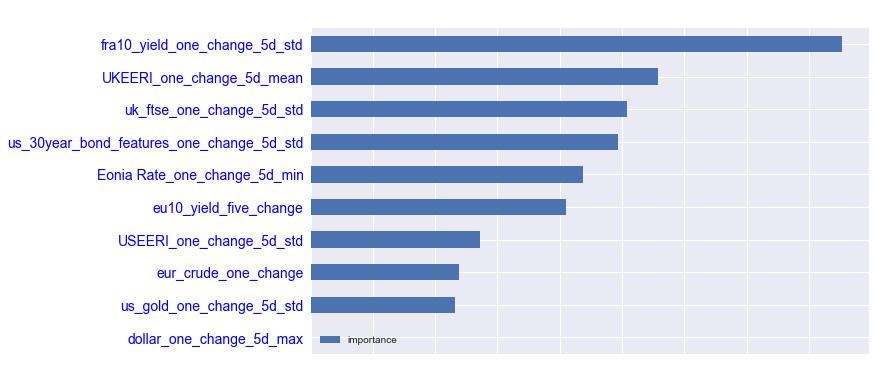

In [512]:
top_10.plot(kind = "barh", figsize=(10,6), fontsize=14)
plt.title("Top 10 important features in DecisionTreeClassifier Model", fontsize=20, color='w')
plt.xticks(color='w')
plt.yticks(color='b')
plt.show()

### SGDClassifier


In [64]:
param_grid = {
    'penalty':['l1','l2'],
    'alpha':np.logspace(-5,5,50),
    'l1_ratio': [0.05, 0.1, 0.15, 0.30],
    'class_weight': ['balanced', None],
    'loss': ['hinge', 'log']
}
cv = TimeSeriesSplit(n_splits=5)
sgd = SGDClassifier()
grid_search_sgd = GridSearchCV(sgd, param_grid=param_grid, cv=cv, n_jobs=2, verbose=1)
grid_search_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=2)]: Done 240 tasks      | elapsed:    4.1s
[Parallel(n_jobs=2)]: Done 1140 tasks      | elapsed:   19.3s
[Parallel(n_jobs=2)]: Done 2640 tasks      | elapsed:   45.2s
[Parallel(n_jobs=2)]: Done 4740 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 7440 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 8000 out of 8000 | elapsed:  2.4min finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=5), error_score='raise',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'penalty': ['l1', 'l2'], 'alpha': array([  1.00000e-05,   1.59986e-05,   2.55955e-05,   4.09492e-05,
         6.55129e-05,   1.04811e-04,   1.67683e-04,   2.68270e-04,
         4.29193e-04,   6.86649e-04,   1.09854e-03,   1.75751e-03,
         2.81177e-03,   4.49843e-03,   7.19686e-03,  ...), 'class_weight': ['balanced', None], 'loss': ['hinge', 'log'], 'l1_ratio': [0.05, 0.1, 0.15, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [65]:
# best model estimator
sgd_best_model = grid_search_sgd.best_estimator_
print "Best model:\n", sgd_best_model

Best model:
SGDClassifier(alpha=3.2374575428176464, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)


In [66]:
# best tuned parameters
sgd_best_parameters = grid_search_sgd.best_params_
print "Best parameters:\n", sgd_best_parameters

Best parameters:
{'penalty': 'l2', 'alpha': 3.2374575428176464, 'loss': 'hinge', 'l1_ratio': 0.15, 'class_weight': None}


In [101]:
# best score
sgd_best_score = sgd_best_model.score(X_test, y_test)
# model predictions
sgd_pred = sgd_best_model.predict(X_test)
sgd_precision = precision_score(y_test, sgd_pred)
sgd_recall = recall_score(y_test, sgd_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.3f}".format(sgd_best_score)
print "Precision score:{: .2f}".format(sgd_precision)
print "Recall score: {: .2f}".format(sgd_recall)

Baseline score:	0.521
Best score:	0.480
Precision score: 0.50
Recall score:  0.13


### BaggingClassifier(SGDClassifier)

In [162]:
sgd_best_model

SGDClassifier(alpha=0.1206792640639329, average=False, class_weight=None,
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.05,
       learning_rate='optimal', loss='log', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [68]:
param_grid = {"n_estimators": [450, 500],
              "max_samples": [0.6, 0.5, 0.7],
              "max_features": [0.7, 0.5, 0.6],
              'bootstrap': [True, False]
             }
sgd_best_model
sgd = SGDClassifier()
bc_sgd = BaggingClassifier(sgd, n_jobs=2)

# run grid search
grid_search_bc_sgd = GridSearchCV(bc_sgd, param_grid=param_grid, cv=cv, n_jobs=2, verbose=1)
grid_search_bc_sgd.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/iurigo/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/iurigo/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done 180 out of 180 | elapsed: 12.5min finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=5), error_score='raise',
       estimator=BaggingClassifier(base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=Tru...n_estimators=10, n_jobs=2, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'n_estimators': [450, 500], 'max_samples': [0.6, 0.5, 0.7], 'bootstrap': [True, False], 'max_features': [0.7, 0.5, 0.6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [69]:
# best model estimator
bc_sgd_best_model = grid_search_bc_sgd.best_estimator_
print "Best model:\n", bc_sgd_best_model

Best model:
BaggingClassifier(base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=0.7,
         max_samples=0.5, n_estimators=500, n_jobs=2, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


In [70]:
# best tuned parameters
bc_sgd_best_parameters = grid_search_bc_sgd.best_params_
print "Best parameters:\n", bc_sgd_best_parameters

Best parameters:
{'max_features': 0.7, 'max_samples': 0.5, 'bootstrap': True, 'n_estimators': 500}


In [102]:
# best score
bc_sgd_best_score = bc_sgd_best_model.score(X_test, y_test)
# model predictions
bc_sgd_pred = bc_sgd_best_model.predict(X_test)
bc_sgd_precision = precision_score(y_test, bc_sgd_pred)
bc_sgd_recall = recall_score(y_test, bc_sgd_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.3f}".format(bc_sgd_best_score)
print "Precision score:{: .2f}".format(bc_sgd_precision)
print "Recall score: {: .2f}".format(bc_sgd_recall)

Baseline score:	0.521
Best score:	0.490
Precision score: 0.51
Recall score:  0.46


### BaggingClassifier

In [72]:
param_grid = {"n_estimators": [1000],
              "max_samples": [1.0, 0.5, 0.1],
              "max_features": [1.0, 0.5, 0.1],
              'bootstrap': [True, False]
             }
cv = TimeSeriesSplit(n_splits=5)
dtc = DecisionTreeClassifier()
bc = BaggingClassifier(dtc, n_jobs=2)

# run grid search
grid_search_bc = GridSearchCV(bc, param_grid=param_grid, cv=cv, n_jobs=2, verbose=1)
grid_search_bc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/iurigo/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
/Users/iurigo/anaconda/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:540: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  **self._backend_args)
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 26.1min
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed: 60.8min finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=5), error_score='raise',
       estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
        ...n_estimators=10, n_jobs=2, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'n_estimators': [1000], 'max_samples': [1.0, 0.5, 0.1], 'bootstrap': [True, False], 'max_features': [1.0, 0.5, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [73]:
# best model estimator
bc_best_model = grid_search_bc.best_estimator_
print "Best model:\n", bc_best_model

Best model:
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=False, bootstrap_features=False, max_features=0.5,
         max_samples=0.1, n_estimators=1000, n_jobs=2, oob_score=False,
         random_state=None, verbose=0, warm_start=False)


In [74]:
# best tuned parameters
bc_best_parameters = grid_search_bc.best_params_
print "Best parameters:\n", bc_best_parameters

Best parameters:
{'max_features': 0.5, 'max_samples': 0.1, 'bootstrap': False, 'n_estimators': 1000}


In [103]:
# best score
bc_best_score = bc_best_model.score(X_test, y_test)
# model predictions
bc_pred = bc_best_model.predict(X_test)
bc_precision = precision_score(y_test, bc_pred)
bc_recall = recall_score(y_test, bc_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.3f}".format(bc_best_score)
print "Precision score:{: .2f}".format(bc_precision)
print "Recall score: {: .2f}".format(bc_recall)

Baseline score:	0.521
Best score:	0.504
Precision score: 0.55
Recall score:  0.26


### AdaBoostClassifier (DecisionTreeClassifier)

In [108]:
# parameters to tune
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [800, 850, 1000]
             }
cv = TimeSeriesSplit(n_splits=3)
dtc = DecisionTreeClassifier()
abc = AdaBoostClassifier(base_estimator = dtc)

# run grid search
grid_search_abc = GridSearchCV(abc, param_grid=param_grid, cv=cv, n_jobs=2, verbose=2)
grid_search_abc.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] n_estimators=800, base_estimator__criterion=gini, base_estimator__splitter=best 
[CV] n_estimators=800, base_estimator__criterion=gini, base_estimator__splitter=best 
[CV]  n_estimators=800, base_estimator__criterion=gini, base_estimator__splitter=best, total=   0.2s
[CV] n_estimators=800, base_estimator__criterion=gini, base_estimator__splitter=best 
[CV]  n_estimators=800, base_estimator__criterion=gini, base_estimator__splitter=best, total=   0.4s
[CV] n_estimators=850, base_estimator__criterion=gini, base_estimator__splitter=best 
[CV]  n_estimators=850, base_estimator__criterion=gini, base_estimator__splitter=best, total=   0.2s
[CV] n_estimators=850, base_estimator__criterion=gini, base_estimator__splitter=best 
[CV]  n_estimators=800, base_estimator__criterion=gini, base_estimator__splitter=best, total=   0.7s
[CV] n_estimators=850, base_estimator__criterion=gini, base_estimator__splitter=best 
[CV]  n_estimators=

[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:    6.7s finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=3), error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'n_estimators': [800, 850, 1000], 'base_estimator__criterion': ['gini', 'entropy'], 'base_estimator__splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [109]:
# best model estimator
abc_best_model = grid_search_abc.best_estimator_
print "Best model:\n", abc_best_model

Best model:
AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random'),
          learning_rate=1.0, n_estimators=850, random_state=None)


In [110]:
# best tuned parameters
abc_best_parameters = grid_search_abc.best_params_
print "Best parameters:\n", abc_best_parameters

Best parameters:
{'n_estimators': 850, 'base_estimator__criterion': 'gini', 'base_estimator__splitter': 'random'}


In [111]:
# best score
abc_best_score = abc_best_model.score(X_test, y_test)
# model predictions
abc_pred = abc_best_model.predict(X_test)
abc_precision = precision_score(y_test, abc_pred)
abc_recall = recall_score(y_test, abc_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.3f}".format(abc_best_score)
print "Precision score:{: .2f}".format(abc_precision)
print "Recall score: {: .2f}".format(abc_recall)

Baseline score:	0.521
Best score:	0.502
Precision score: 0.52
Recall score:  0.50


In [237]:
abc_feature_importances = pd.DataFrame(abc_best_model.feature_importances_,
                                   index = data.iloc[:train_set, :-2].columns,
                                    columns=['importance'])
top_10 = abc_feature_importances.sort_values(by='importance', ascending=True).tail(10)

In [238]:
top_10.sort_values(by='importance', ascending=False)

,importance
eur_crude_one_change_5d_mean,0.015068
aus10_yield_one_change_5d_std,0.012734
uk_gilt_one_change_5d_mean,0.012140
JPY/USD_one_change_5d_min,0.011993
USEERI_one_change_5d_std,0.011756
eu_stoxx_50_one_change_5d_min,0.011626
EUR/USD_one_change_5d_std,0.011580
eu10_yield_one_change_5d_std,0.010424
us_crude_one_change,0.010267
AUD/USD_one_change_5d_std,0.009807


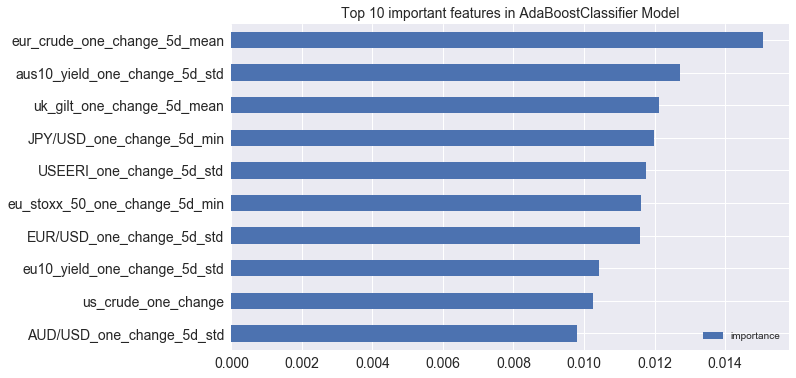

In [239]:
top_10.plot(kind = "barh", figsize=(10,6), fontsize=14)
plt.title("Top 10 important features in AdaBoostClassifier Model", fontsize=14)
plt.show()

### AdaBoostClassifier (SGDClassifier)

In [93]:
# parameters to tune
param_grid = {
              'base_estimator__l1_ratio': [0.05, 0.1, 0.15, 0.30],
              "n_estimators": [500, 550, 600]}

sgd = SGDClassifier()
cv = TimeSeriesSplit(n_splits=3)
abc_sgd = AdaBoostClassifier(base_estimator = sgd, algorithm='SAMME', learning_rate=0.05)

# run grid search
grid_search_abc_sgd = GridSearchCV(abc_sgd, param_grid=param_grid, cv=cv, n_jobs=2, verbose=2)
grid_search_abc_sgd.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] n_estimators=500, base_estimator__l1_ratio=0.05 .................
[CV] n_estimators=500, base_estimator__l1_ratio=0.05 .................
[CV] .. n_estimators=500, base_estimator__l1_ratio=0.05, total=   1.8s
[CV] n_estimators=500, base_estimator__l1_ratio=0.05 .................
[CV] .. n_estimators=500, base_estimator__l1_ratio=0.05, total=   2.4s
[CV] n_estimators=550, base_estimator__l1_ratio=0.05 .................
[CV] .. n_estimators=550, base_estimator__l1_ratio=0.05, total=   1.0s
[CV] n_estimators=550, base_estimator__l1_ratio=0.05 .................
[CV] .. n_estimators=500, base_estimator__l1_ratio=0.05, total=   4.0s
[CV] n_estimators=550, base_estimator__l1_ratio=0.05 .................
[CV] .. n_estimators=550, base_estimator__l1_ratio=0.05, total=   3.1s
[CV] n_estimators=600, base_estimator__l1_ratio=0.05 .................
[CV] .. n_estimators=600, base_estimator__l1_ratio=0.05, total=   2.9s
[CV] n_estimator

[Parallel(n_jobs=2)]: Done  36 out of  36 | elapsed:   50.4s finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=3), error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False),
          learning_rate=0.05, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'n_estimators': [500, 550, 600], 'base_estimator__l1_ratio': [0.05, 0.1, 0.15, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [94]:
# best model estimator
abc_sgd_best_model = grid_search_abc_sgd.best_estimator_
print "Best model:\n", abc_sgd_best_model

Best model:
AdaBoostClassifier(algorithm='SAMME',
          base_estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.3, learning_rate='optimal',
       loss='hinge', n_iter=5, n_jobs=1, penalty='l2', power_t=0.5,
       random_state=None, shuffle=True, verbose=0, warm_start=False),
          learning_rate=0.05, n_estimators=600, random_state=None)


In [95]:
# best tuned parameters
abc_sgd_best_parameters = grid_search_abc_sgd.best_params_
print "Best parameters:\n", abc_sgd_best_parameters

Best parameters:
{'n_estimators': 600, 'base_estimator__l1_ratio': 0.3}


In [96]:
# best score
abc_sgd_best_score = abc_sgd_best_model.score(X_test, y_test)
# model predictions
abc_sgd_pred = abc_sgd_best_model.predict(X_test)
abc_sgd_precision = precision_score(y_test, abc_sgd_pred)
abc_sgd_recall = recall_score(y_test, abc_sgd_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.3f}".format(abc_sgd_best_score)
print "Precision score:{: .2f}".format(abc_sgd_precision)
print "Recall score: {: .2f}".format(abc_sgd_recall)

Baseline score:	0.521
Best score:	0.500
Precision score: 0.52
Recall score:  0.47


### RandomForestClassifier


In [133]:
# parameters to tune
param_grid = {"n_estimators": [190, 200, 210],
              "bootstrap": [True, False],
              "min_samples_leaf": [1, 2, 3],
              "max_features": [1.0, 0.5, 0.1],
              "max_depth": [None, 3, 5]
             }
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid=param_grid, verbose=2, cv=cv, n_jobs=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=190 ................................................
[CV] n_estimators=190 ................................................
[CV] ................................. n_estimators=190, total=   1.5s
[CV] n_estimators=190 ................................................
[CV] ................................. n_estimators=190, total=   2.1s
[CV] n_estimators=190 ................................................
[CV] ................................. n_estimators=190, total=   2.6s
[CV] n_estimators=190 ................................................
[CV] ................................. n_estimators=190, total=   3.5s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=   1.3s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=190, total=   4.4s
[CV] n_estimators

[Parallel(n_jobs=2)]: Done  15 out of  15 | elapsed:   25.0s finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=5), error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'n_estimators': [190, 200, 210]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [137]:
# best model estimator
rf_best_model = grid_search_rf.best_estimator_
print "Best model:\n", rf_best_model

Best model:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [138]:
# best tuned parameters
rf_best_parameters = grid_search_rf.best_params_
print "Best parameters:\n", rf_best_parameters

Best parameters:
{'n_estimators': 200}


In [139]:
# best score
rf_best_score = rf_best_model.score(X_test, y_test)
# model predictions
rf_pred = rf_best_model.predict(X_test)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.3f}".format(rf_best_score)
print "Precision score:{: .2f}".format(rf_precision)
print "Recall score: {: .2f}".format(rf_recall)

Baseline score:	0.521
Best score:	0.516
Precision score: 0.55
Recall score:  0.36


In [233]:
rf_feature_importances = pd.DataFrame(rf_best_model.feature_importances_,
                                   index = data.iloc[:train_set, :-2].columns,
                                    columns=['importance'])
top_10 = rf_feature_importances.sort_values(by='importance', ascending=True).tail(10)

In [234]:
top_10.sort_values(by='importance', ascending=False)

,importance
SONIA_one_change,0.004716
dollar_one_change,0.004245
us10_yield_one_change,0.004020
EUR/USD_one_change,0.003992
SwedEERI_one_change,0.003944
us_crude_one_change,0.003900
swed_omx_one_change,0.003837
ita10_yield_one_change,0.003832
JPY/USD_one_change,0.003819
can10_yield_one_change,0.003785


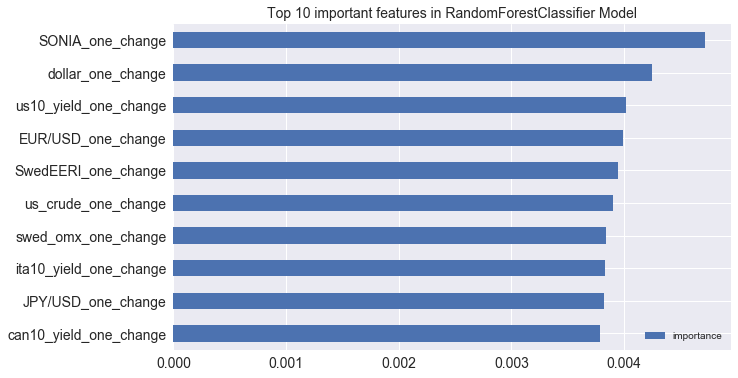

In [235]:
top_10.plot(kind = "barh", figsize=(10,6), fontsize=14)
plt.title("Top 10 important features in RandomForestClassifier Model", fontsize=14)
plt.show()

### GradientBoostingClassifier

In [121]:
# parameters to tune
param_grid = {"learning_rate" : [0.05, 0.3, 0.1],
#               "max_depth" :   [4,6,None],
#               "min_samples_leaf": [3, 9, 17],
              "max_features": [1.0, 0.5, 0.1],
              "n_estimators": [100, 200, 500]
              
             }
gb = GradientBoostingClassifier()
# run grid search
grid_search_gb = GridSearchCV(gb, param_grid=param_grid, verbose=2, cv=cv, n_jobs=2)
grid_search_gb.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] max_features=1.0, n_estimators=100, learning_rate=0.05 ..........
[CV] max_features=1.0, n_estimators=100, learning_rate=0.05 ..........
[CV]  max_features=1.0, n_estimators=100, learning_rate=0.05, total=   2.0s
[CV] max_features=1.0, n_estimators=100, learning_rate=0.05 ..........
[CV]  max_features=1.0, n_estimators=100, learning_rate=0.05, total=   3.6s
[CV] max_features=1.0, n_estimators=200, learning_rate=0.05 ..........
[CV]  max_features=1.0, n_estimators=200, learning_rate=0.05, total=   3.1s
[CV] max_features=1.0, n_estimators=200, learning_rate=0.05 ..........
[CV]  max_features=1.0, n_estimators=100, learning_rate=0.05, total=   4.9s
[CV] max_features=1.0, n_estimators=200, learning_rate=0.05 ..........
[CV]  max_features=1.0, n_estimators=200, learning_rate=0.05, total=   6.7s
[CV] max_features=1.0, n_estimators=500, learning_rate=0.05 ..........
[CV]  max_features=1.0, n_estimators=200, learning_rate=0.05, 

[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.7min


[CV]  max_features=0.5, n_estimators=100, learning_rate=0.3, total=   2.6s
[CV] max_features=0.5, n_estimators=200, learning_rate=0.3 ...........
[CV]  max_features=0.5, n_estimators=200, learning_rate=0.3, total=   1.6s
[CV] max_features=0.5, n_estimators=200, learning_rate=0.3 ...........
[CV]  max_features=1.0, n_estimators=500, learning_rate=0.3, total=  24.3s
[CV] max_features=0.5, n_estimators=200, learning_rate=0.3 ...........
[CV]  max_features=0.5, n_estimators=200, learning_rate=0.3, total=   3.4s
[CV] max_features=0.5, n_estimators=500, learning_rate=0.3 ...........
[CV]  max_features=0.5, n_estimators=500, learning_rate=0.3, total=   2.6s
[CV] max_features=0.5, n_estimators=500, learning_rate=0.3 ...........
[CV]  max_features=0.5, n_estimators=200, learning_rate=0.3, total=   5.1s
[CV] max_features=0.5, n_estimators=500, learning_rate=0.3 ...........
[CV]  max_features=0.5, n_estimators=500, learning_rate=0.3, total=   8.1s
[CV] max_features=0.1, n_estimators=100, learning

[Parallel(n_jobs=2)]: Done  81 out of  81 | elapsed:  3.2min finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=3), error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'max_features': [1.0, 0.5, 0.1], 'n_estimators': [100, 200, 500], 'learning_rate': [0.05, 0.3, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [122]:
# best model estimator
gb_best_model = grid_search_gb.best_estimator_
print "Best model:\n", gb_best_model

Best model:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=0.5, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


In [123]:
# best tuned parameters
gb_best_parameters = grid_search_gb.best_params_
print "Best parameters:\n", gb_best_parameters

Best parameters:
{'max_features': 0.5, 'n_estimators': 100, 'learning_rate': 0.1}


In [124]:
# best score
gb_best_score = gb_best_model.score(X_test, y_test)
# model predictions
gb_pred = gb_best_model.predict(X_test)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.3f}".format(gb_best_score)
print "Precision score:{: .2f}".format(gb_precision)
print "Recall score: {: .2f}".format(gb_recall)

Baseline score:	0.521
Best score:	0.506
Precision score: 0.53
Recall score:  0.48


In [230]:
gb_feature_importances = pd.DataFrame(gb_best_model.feature_importances_,
                                   index = data.iloc[:train_set, :-2].columns,
                                    columns=['importance'])
top_10 = gb_feature_importances.sort_values(by='importance', ascending=True).tail(10)

In [231]:
top_10.sort_values(by='importance', ascending=False)

,importance
SONIA_one_change,0.025975
aus10_yield_one_change_5d_std,0.012835
CAD/USD_one_change_5d_std,0.012011
dollar_one_change,0.011663
UKEERI_one_change,0.011165
eu10_yield_one_change_5d_min,0.011084
ita10_yield_five_change,0.010298
JapEERI_five_change,0.009941
chf_gold_one_change_5d_max,0.009906
SDK/USD_one_change,0.009731


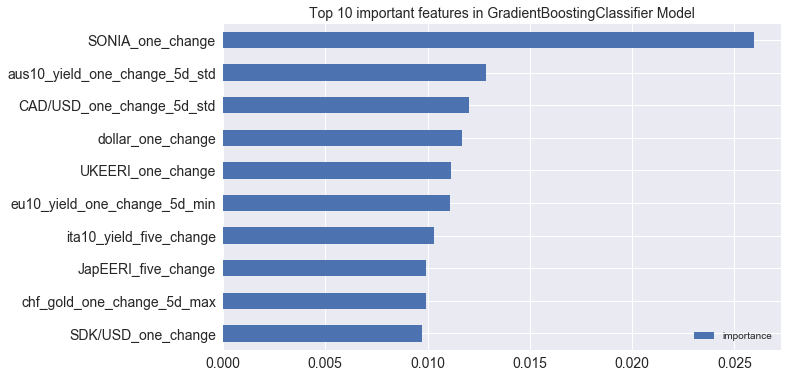

In [232]:
top_10.plot(kind = "barh", figsize=(10,6), fontsize=14)
plt.title("Top 10 important features in GradientBoostingClassifier Model", fontsize=14)
plt.show()

### ExtraTreeClassifier

In [140]:
# parameters to tune
param_grid = {"criterion" : ["gini", "entropy"],
              "min_samples_leaf": [1, 2, 3, 4],
              "max_features": [0.1, 0.5, 0.7],
              "max_depth": [None, 1, 5, 7, 9, 11],
              "splitter" : ['random', 'best']
             }
cv = TimeSeriesSplit(n_splits=5)
et = ExtraTreeClassifier()
grid_search_et = GridSearchCV(et, param_grid=param_grid, verbose=2, cv=cv, n_jobs=2)
grid_search_et.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=

[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=None, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=1, total=   0.0s
[CV] max_features

[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=4, total=   0.3s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=1, total=   0.2s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=4, total=   0.3s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=None, min_samples_leaf=1, total=   0.3s
[CV] max_features=0.7, sp

[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=g

[Parallel(n_jobs=2)]: Done 128 tasks      | elapsed:    7.4s


[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.1, splitter=bes

[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV]  max_features=0.5, splitter=best, criterion=

[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=1, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=1, min_samples_leaf=3, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=g

[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=3, total=   0.1s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=3 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=3, total=   0.1s
[CV] max_features=0.1, splitter=random, cri

[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=3, total=   0.2s
[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.5, splitter=random, criteri

[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=5, min_samples_leaf=3, total=   0.2s
[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=random, criterion=gini, max_depth=5, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=random, cri

[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=7, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=7, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1, total=   0.0s
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=7, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1 
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=7, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.5, splitter=random, cri

[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=random, criterion=gini, max_depth=7, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=7, min_samples_leaf=4, total=   0.2s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=7, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=7, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.7, splitter=best, crite

[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=7, min_samples_leaf=4, total=   0.3s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=7, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.1, splitter=best, criterion=gini, m

[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1, total=   0.3s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1, total=   0.2s
[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=9, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=9, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.5, splitter=random, criteri

[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=random, criterion=gini, max_depth=9, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=random, criterion=gini, max_depth=9, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1, total=   0.4s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion

[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=9, min_samples_leaf=4, total=   0.5s
[CV] max_features=0.1, splitter=random

[Parallel(n_jobs=2)]: Done 612 tasks      | elapsed:   26.0s


[CV]  max_features=0.1, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=2, total=   0.1s
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3 
[CV] max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.1, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3, total=   0.1s
[CV] max_features=0.1, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=random, 

[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3, total=   0.2s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=2, total=   0.3s
[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3, total=   0.2s
[CV] max_features=0.5, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.5, splitter=rando

[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.7, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=random, criterion=gini, max_depth=11, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3, total=   0.4s
[CV] max_features=0.7, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.7, splitter=best, criterion=gini, max_depth=11, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.7, splitter=best,

[CV] max_features=0.1, splitter=random, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=None, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=3, total=   0.2s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=3 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4, total

[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=None, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=None, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4, total=   0.2s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=3, total=   0.8s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=None, min_sam

[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=None, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=None, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=3, total=   0.7s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=3 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=None, min_samples_leaf=4, t

[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=1, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=entropy, max_depth=1, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=1, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4 
[CV]  max_features=

[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=3, total=   0.1s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=3 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4, total=   0.0s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=3, total=   0.1s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=1, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=1, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=1, min_samples_leaf=1 
[CV]  max_features=

[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=3, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.1, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=1, min_samples_leaf=4 
[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_featu

[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=5, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=5, min_samples_leaf=4 
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=5, min_samples_leaf=4, total=   0.1s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_fea

[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=5, min_samples_leaf=4, total=   0.3s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=5, min_samples_leaf=1 
[CV]  max_fea

[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1, total=   0.1s
[CV] max_features=0.1, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  max_features=0.1,

[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1, total=   0.1s
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1 
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  max

[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2, total=   0.0s
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1, total=   0.2s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=7, min_samples_leaf=2 
[CV]  max

[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=7, min_samples_leaf=4, total=   0.6s
[CV] max_features=0.1, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=2, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=1, total=   0.0s
[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=2, total=

[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=9, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=1, total=   0.2s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2, total=   0.2s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=1, total=   0.3s
[CV] max_features=0.5

[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=1, total=   0.4s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2, total=   0.2s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=1, total=   0.5s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=1 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=9, min_samples_leaf=2, total=   0.3s
[CV] max_features=0.7, sp

[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=1, total=   0.0s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2, total=   0.1s
[CV] max_features=0.1, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.1, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2, total=   0.1s
[CV] max_feat

[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2, total=   0.3s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=1, total=   0.4s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=1 


[Parallel(n_jobs=2)]: Done 1374 tasks      | elapsed:  1.2min


[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2, total=   0.4s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=2 
[CV]  max_features=0.5, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=1, total=   0.5s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.5, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.5, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.5, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=3 
[CV

[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3, total=   0.0s
[CV] max_features=0.7, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.7, splitter=random, criterion=entropy, max_depth=11, min_samples_leaf=3, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=3, total=   0.1s
[CV] max_features=0.7, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=3 
[CV]  max_features=0.7, splitter=best, criterion=entropy, max_depth=11, min_samples_leaf=3, total=   0.2s
[CV

[Parallel(n_jobs=2)]: Done 1440 out of 1440 | elapsed:  1.3min finished


GridSearchCV(cv=TimeSeriesSplit(n_splits=5), error_score='raise',
       estimator=ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          random_state=None, splitter='random'),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'max_features': [0.1, 0.5, 0.7], 'splitter': ['random', 'best'], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 5, 7, 9, 11], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [141]:
# best model estimator
et_best_model = grid_search_et.best_estimator_
print "Best model:\n", et_best_model

Best model:
ExtraTreeClassifier(class_weight=None, criterion='entropy', max_depth=9,
          max_features=0.1, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=2, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None, splitter='best')


In [142]:
# best tuned parameters
et_best_parameters = grid_search_et.best_params_
print "Best parameters:\n", et_best_parameters

Best parameters:
{'max_features': 0.1, 'splitter': 'best', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2}


In [143]:
# best score
et_best_score = et_best_model.score(X_test, y_test)
# model predictions
et_pred = et_best_model.predict(X_test)
et_precision = precision_score(y_test, et_pred)
et_recall = recall_score(y_test, et_pred)
print "Baseline score:\t{:.3f}".format(1 - y.mean())
print "Best score:\t{:.3f}".format(et_best_score)
print "Precision score:{: .2f}".format(et_precision)
print "Recall score: {: .2f}".format(et_recall)

Baseline score:	0.521
Best score:	0.508
Precision score: 0.53
Recall score:  0.49


In [227]:
et_feature_importances = pd.DataFrame(et_best_model.feature_importances_,
                                   index = data.iloc[:train_set, :-2].columns,
                                    columns=['importance'])
top_10 = et_feature_importances.sort_values(by='importance', ascending=True).tail(10)

In [228]:
top_10.sort_values(by='importance', ascending=False)

,importance
s_p_500_one_change,0.038446
chf_gold_one_change,0.029598
swed10_yield_one_change_5d_mean,0.026185
aus10_yield_one_change_5d_std,0.024190
30mortgage_one_change,0.023047
SwedEERI_one_change_5d_mean,0.022747
ger_dax_one_change_5d_min,0.021656
uk_ftse_five_change,0.021584
chf_gold_one_change_5d_mean,0.020158
ita10_yield_one_change_5d_mean,0.020041


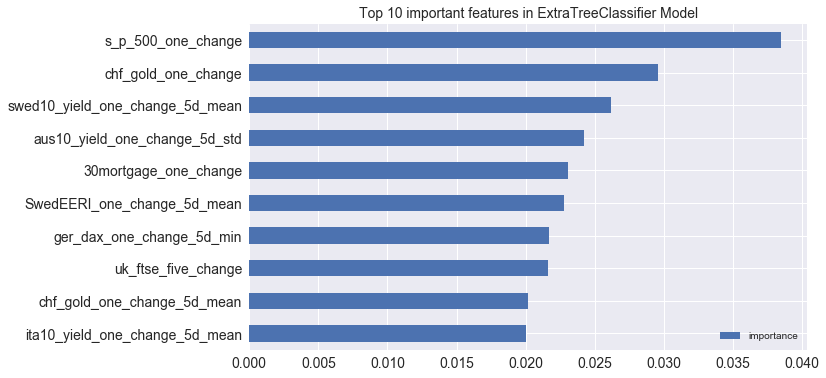

In [229]:
top_10.plot(kind = "barh", figsize=(10,6), fontsize=14)
plt.title("Top 10 important features in ExtraTreeClassifier Model", fontsize=14)
plt.show()

### Compare feature importance by each model

In [506]:
importances = pd.DataFrame(zip(dtc_best_model.feature_importances_,abc_best_model.feature_importances_,\
            rf_best_model.feature_importances_, gb_best_model.feature_importances_, et_best_model.feature_importances_),
            index=data.iloc[:train_set, :-2].columns, columns=['dtc_importance', 'abc_importance', 'rf_importance',\
                                           'gb_importance', 'et_importance']).sort_values('dtc_importance',ascending=False)               
importances = importances.head(10)

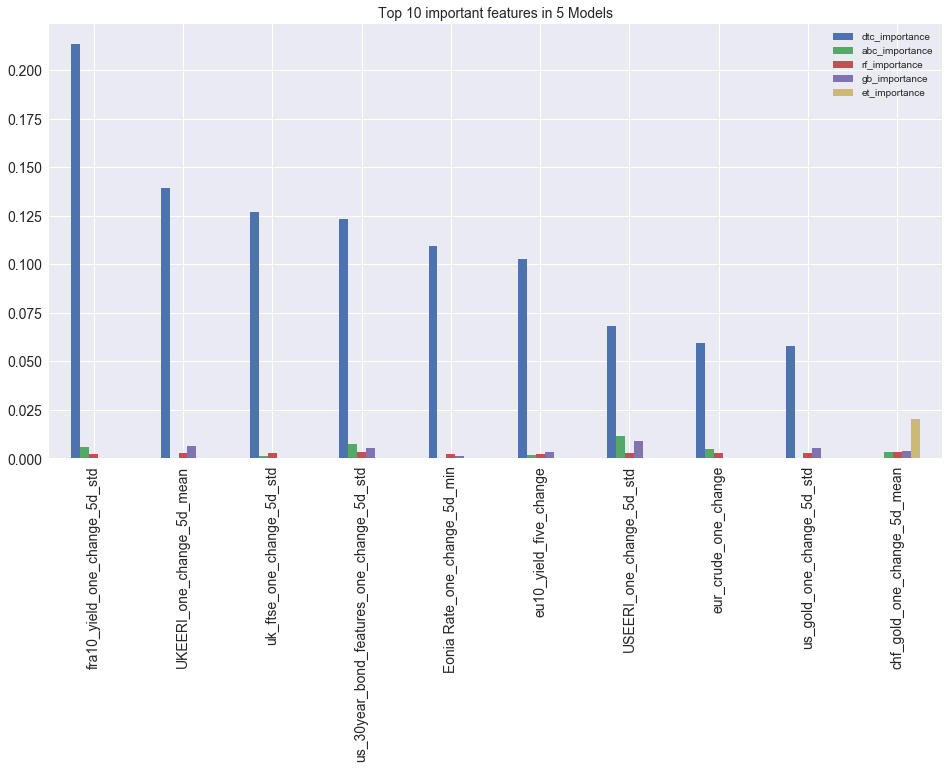

In [507]:
fig, ax = plt.subplots(figsize=(16,8))
importances.plot(kind='bar', ax=ax, fontsize=14)
plt.title("Top 10 important features in 5 Models", fontsize=14);


### Compare scores by each model

In [342]:
scores = pd.DataFrame({'ExtraTreeClassifier': [et_best_score, et_precision, et_recall], 
             'GradientBoostingClassifier': [gb_best_score, gb_precision, gb_recall],
             'RandomForestClassifier': [rf_best_score, rf_precision, rf_recall],
             'AdaBoostClassifier': [abc_best_score, abc_precision, abc_recall],
             'AdaBoostClassifier SGD': [abc_sgd_best_score, abc_sgd_precision, abc_sgd_recall],
             'BaggingClassifier': [bc_best_score, bc_precision, bc_recall],
             'BaggingClassifier': [bc_sgd_best_score, bc_sgd_precision, bc_sgd_recall],                        
             'DecisionTreeClassifier': [dtc_best_score, dtc_precision, dtc_recall],
             'SVC': [svc_best_score, svc_precision, svc_recall],
             'KNeighborsClassifier': [knn_best_score, knn_precision, knn_recall],
             'BernoulliNB': [bn_best_score, bn_precision, bn_recall],
             })
scores = scores.T.rename(columns={0:'Accuracy score', 1:'Precision score', 2: 'Recall score'}).sort_values('Precision score', ascending=False)


In [343]:
scores

,Accuracy score,Precision score,Recall score
DecisionTreeClassifier,0.538934,0.555133,0.574803
RandomForestClassifier,0.516393,0.554217,0.362205
BernoulliNB,0.514344,0.538117,0.472441
SVC,0.500000,0.536232,0.291339
ExtraTreeClassifier,0.508197,0.529661,0.492126
GradientBoostingClassifier,0.506148,0.528139,0.480315
AdaBoostClassifier,0.502049,0.522634,0.500000
AdaBoostClassifier SGD,0.500000,0.521739,0.472441
BaggingClassifier,0.489754,0.511013,0.456693
KNeighborsClassifier,0.477459,0.495935,0.240157


### Train / Test split for final result

In [347]:
train_set = int(round(data.shape[0]*.8))
train_set

2442

In [348]:
X_final_test = data.iloc[train_set:, :-2]
X_final_test.shape

(610, 384)

In [349]:
X_final_train = data.iloc[:train_set, :-2]
X_final_train.shape

(2442, 384)

In [350]:
y_final_train = data.iloc[:train_set, -1].values
y_final_train.shape

(2442,)

In [351]:
y_final_test = data.iloc[train_set:, -1].values
y_final_test.shape

(610,)

#### Fit model on train set

In [217]:
dtc_best_model.fit(X_final_train, y_final_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=0.6, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=16,
            min_samples_split=6, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

#### Generate predictions

In [513]:
final_results = dtc_best_model.predict(X_final_test)

In [514]:
final_df = data.iloc[train_set:, :]

In [515]:
final_df['predictions'] = final_results

In [516]:
final_df['predictions'].value_counts()

0    584
1     26
Name: predictions, dtype: int64

In [517]:
final_df[['returns', 'predictions']][:10]

,returns,predictions
Date,,
2015-04-15,-0.007319,0
2015-04-16,-0.002048,0
2015-04-17,0.004823,0
2015-04-20,0.000408,0
2015-04-21,0.001123,0
2015-04-22,-0.007750,0
2015-04-23,-0.004624,0
2015-04-24,-0.001136,0
2015-04-27,-0.006925,0


#### The 'Buy' or 'Sell' strategy

In [520]:
new_list = []
for i, j in zip(final_df.returns, final_df.predictions):
    if j == 1:
        new_list.append(i)
    else:
        new_list.append(-i)
        

In [521]:
# create 'simulation' column to perform trading
final_df['simulation'] = new_list

In [561]:
final_return = (final_df.simulation.compound())

In [562]:
max_profit = final_df.simulation.max()

In [ ]:
max_loss = final_df.simulation.min()

In [ ]:
profitable_days = final_df2.simulation[final_df2.simulation >= 0].size

In [ ]:
losing_days = final_df2.simulation[final_df2.simulation < 0].size

In [ ]:
average_profit = final_df2.simulation[final_df2.simulation >= 0].mean()

In [ ]:
average_loss = final_df2.simulation[final_df2.simulation < 0].mean()

In [563]:
print 'The return over 2 years period is:', str(round(final_return*100, 2)) + '%'
print 'Total profitable days:', profitable_days
print 'The maximum daily profit is:', str(round(max_profit*100, 2)) + '%'
print "Average daily profit is:", str(round(average_profit*100, 2)) + '%'

The return over 2 years period is: 8.48%
Total profitable days: 312
The maximum daily profit is: 2.09%
Average daily profit is: 0.36%


In [564]:
print 'Total losing days:', losing_days
print 'The maximum daily loss is:', str(round(max_loss*100, 2)) + '%'
print "Average daily loss is:", str(round(average_loss*100, 2)) + '%'

Total losing days: 298
The maximum daily loss is: -2.63%
Average daily loss is: -0.35%


#### Only 'Buy' strategy

In [572]:
buy_return = final_df['returns'][final_df.predictions == 1].compound()


In [573]:
buy_loss = []
buy_profit = []
for i, j in zip(final_df.returns, final_df.predictions):
    if i >= 0 and j == 1:
        buy_profit.append(i)
    elif i < 0 and j == 1:
        buy_loss.append(i)

In [577]:
print 'The return over 2 years period is:', str(round(buy_return*100, 2)) + '%'
print 'Total profitable days:', len(buy_profit)
print 'Maximum daily profit:', str(round(max(buy_profit)*100,2)) + '%'
print 'Average daily profit:', str(round(np.mean(buy_profit)*100,2)) + '%'

The return over 2 years period is: 2.17%
Total profitable days: 14
Maximum daily profit: 0.87%
Average daily profit: 0.42%


In [578]:
print 'Total losing days:', len(buy_loss)
print 'Maximum daily loss:', str(round(min(buy_loss)*100,2)) + '%'
print 'Average daily loss:', str(round(np.mean(buy_loss)*100,2)) + '%'

Total losing days: 12
Maximum daily loss: -0.76%
Average daily loss: -0.3%


#### Only 'Sell' strategy

In [579]:
sell_return = final_df['returns'][final_df.predictions == 0].compound()

In [558]:
sell_loss = []
sell_profit = []
for i, j in zip(final_df.returns, final_df.predictions):
    if i <= 0 and j == 0:
        sell_profit.append(i)
    elif i > 0 and j == 0:
        sell_loss.append(i)

In [587]:
print 'The return over 2 years period is:', str(abs(round(sell_return*100, 2))) + '%'
print 'Total profitable days:', len(sell_profit)
print 'Maximum daily return:', str(abs(round(min(sell_profit)*100,2))) + '%'
print 'Average daily return:', str(abs(round(np.mean(sell_profit)*100,2))) + '%'

The return over 2 years period is: 7.03%
Total profitable days: 298
Maximum daily return: 2.09%
Average daily return: 0.36%


In [588]:
print 'Average daily loss:', str(abs(round(np.mean(sell_loss)*100,2))) + '%'
print 'Maximum daily loss:', str(abs(round(max(sell_loss)*100,2))) + '%'
print 'Total losing days:', len(sell_loss)

Average daily loss: 0.35%
Maximum daily loss: 2.63%
Total losing days: 286
